### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

<span style="font-family: Arial; font-size:1.5em;color:purple;"> *1.1 Import the libraries:*

In [1]:
import numpy as np                     # import numpy library
import pandas as pd                    # import pandas library
import matplotlib.pyplot as plt        # import matplotlib library
import seaborn as sns                  # import seaborn library

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
rating = pd.read_csv('Data.csv')       # read rating data
movie = pd.read_csv('item.csv')        # read movie data
user = pd.read_csv('user.csv')         # read user data

### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

<span style="font-family: Arial; font-size:1.5em;color:purple;"> *3.1 Explore the rating dataframe:*

In [3]:
rating.head(5)                        # display the first 5 rows of the rating dataframe

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
rating.info()                         # visualize data type of the rating dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
rating.shape                        # display the shape of the rating dataframe

(100000, 4)

In [6]:
rating.describe()                   # provide summary of the statistics of the rating dataframe

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [7]:
rating.isnull().sum()                                # find missing data in the rating| dataframe

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [8]:
rating.duplicated().sum()  # Find whether there are duplicated items

0

* There is no missing data in the rating dataframe
* There are 100,000 records in this dataframe containing userid, movieid,rating, timestamp (all numbers)

<span style="font-family: Arial; font-size:1.5em;color:purple;"> *3.2 Explore the movie dataframe:*

In [9]:
movie.head(5)                        # display the first 5 rows of the movie dataframe

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [10]:
movie.info()                         # visualize data type of the movie dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [11]:
movie.shape                        # display the shape of the movie dataframe

(1681, 22)

In [12]:
movie.describe()                   # provide summary of the statistics of the movie dataframe

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
movie.isnull().sum()                                # find missing data in the movie dataframe

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [14]:
movie.duplicated().sum()                        # Find whether there are duplicated items

0

* There is no missing data in the movie dataframe
* There are 1681 records in this dataframe containing 22 columns of information, all numbers except movie title and release date

<span style="font-family: Arial; font-size:1.5em;color:purple;"> *3.3 Explore the user dataframe:*

In [15]:
user.head(5)                        # display the first 5 rows of the user dataframe

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [16]:
user.info()                         # visualize data type of the user dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [17]:
user.shape                        # display the shape of the user dataframe

(943, 5)

In [18]:
user.describe()                   # provide summary of the statistics of the user dataframe

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [19]:
user.isnull().sum()                                # find missing data in the user dataframe

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [20]:
user.duplicated().sum()                           # finding duplicated items

0

* There is no missing data in the movie dataframe
* There are 943 records in this dataframe containing userid, age, gender, occupation and zip code, and the last three data are object types (catagorical data)

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [21]:
movie.sum(axis=0)                                                 # sum the total number of movies in each genre

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

* As we can see, we have 1 unknown movie, 251 Action movies, 135 adventure movies, 42 animation movies, 122 childrens' movies, 505 comedies, 109 crime movies, 50 documentaries, 725 dramas, 22 fantasies, 24 film-noir, 92 horror movies, 56 musical movies, 61 mysteries,247 romance movies, 101 Sci-Fi, 251 thriller movies, 71 war movies and 27 western movies

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [22]:
movie[movie['unknown'] == 1]                                   # where is the unknown movie?

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
movie.drop(movie[movie['unknown'] == 1].index, inplace = True) # Drop the 1 movie genre is unknown

In [24]:
movie.shape                                                    # check the shape of the movie dataframe again

(1680, 22)

* At the end of this section, we have dropped 1 unknown movie from the original movie dataframe

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [25]:
movie_temp = movie.copy()
movie_temp['multiple genres'] = movie.drop(['movie id','movie title','release date','unknown'], axis=1).sum(axis=1) # Generate a temporary dataframe
movie_temp2 = movie_temp.loc[:,('movie title','multiple genres')] # Display movie name, number of genres for the movie in dataframe
movie_temp2

,movie title,multiple genres
0,Toy Story,3
1,GoldenEye,3
2,Four Rooms,1
3,Get Shorty,3
4,Copycat,3
...,...,...
1676,Mat' i syn,1
1677,B. Monkey,2
1678,Sliding Doors,2
1679,You So Crazy,1


In [26]:
movie_temp3 = movie_temp2[movie_temp2['multiple genres']>1].loc[:,('movie title','multiple genres')] 
movie_temp3 # Display movie name, number of genres greater than 1 

,movie title,multiple genres
0,Toy Story,3
1,GoldenEye,3
3,Get Shorty,3
4,Copycat,3
6,Twelve Monkeys,2
...,...,...
1667,MURDER and murder,3
1668,Tainted,2
1671,Mirage,2
1677,B. Monkey,2


In [27]:
len(movie_temp3['movie title'].unique())

838

In [28]:
print("The total number of movies having more than one Genre is:", len(movie_temp3['movie title']))
# print(total number of movies which have more than one genres), but does not exclude duplicated titles

The total number of movies having more than one Genre is: 849


In [29]:
print("The movies are:")
print(movie_temp3)

The movies are:
             movie title  multiple genres
0             Toy Story                 3
1             GoldenEye                 3
3            Get Shorty                 3
4               Copycat                 3
6        Twelve Monkeys                 2
...                  ...              ...
1667  MURDER and murder                 3
1668            Tainted                 2
1671             Mirage                 2
1677          B. Monkey                 2
1678      Sliding Doors                 2

[849 rows x 2 columns]


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [30]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:]) 

brown
brown
brown


In [31]:
movie_temp4 = movie.copy()  # Create another temporary dataframe

In [32]:
movie_temp4['release year'] = movie_temp4['release date'].str.split('-').str[2] # Add another column of release year 
movie_temp4

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1998
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1998
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1994


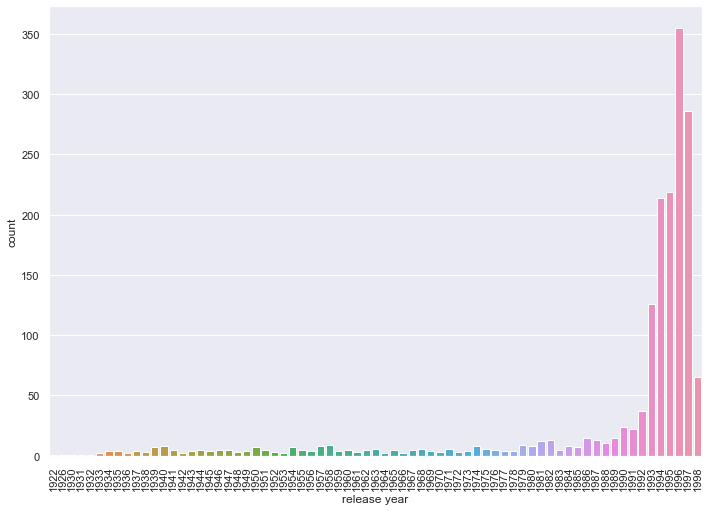

In [33]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ry=sns.countplot(movie_temp4['release year'])   # Univariate plot of number of films release at different years                                                                  
ry.set_xticklabels(ry.get_xticklabels(), rotation=90)
plt.show()

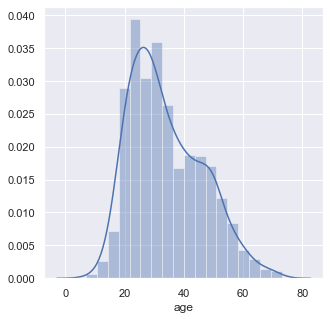

In [34]:
sns.set(rc={'figure.figsize':(5,5)})
userage = sns.distplot(user.age)                              # Univariate plot of user 'Age'
plt.show()

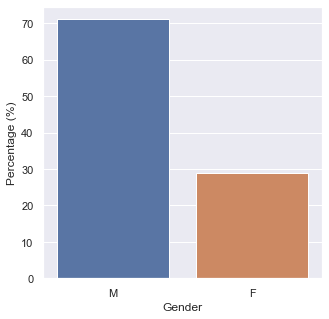

In [35]:
df=(user.gender.value_counts()/user.shape[0]*100).to_frame()      # Convert a dataframe by using computing percentage
df.rename(columns = {"gender": "percentage"},  
          inplace = True)                                         
df['gender']=df.index                            
ax=sns.barplot(x="gender",                                        # Generate the barplots 
               y = "percentage", 
               data=df);
ax.set(xlabel='Gender', ylabel='Percentage (%)');                  # Rename the x and y labels of the plot

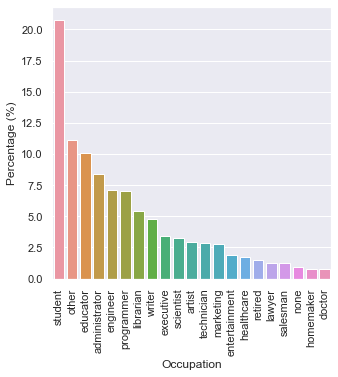

In [36]:
df2=(user.occupation.value_counts()/user.shape[0]*100).to_frame()     # Convert a dataframe by using computing percentage
df2.rename(columns = {"occupation": "percentage"},  
          inplace = True) 
df2['occupation']=df2.index                            
ax2=sns.barplot(x="occupation",                                        # Generate the barplots 
               y = "percentage", 
               data=df2);
ax2.set(xlabel='Occupation', ylabel='Percentage (%)')                  # Rename the x and y labels of the plot
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90);

[Text(0, 0.5, 'Percentage (%)'), Text(0.5, 0, 'Rating')]

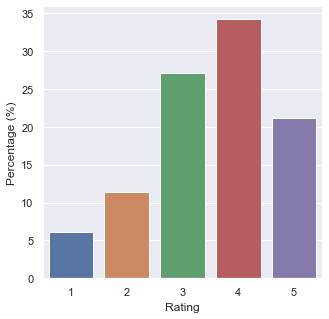

In [37]:
df3=(rating.rating.value_counts()/rating.shape[0]*100).to_frame()      # Convert a dataframe by using computing percentage
df3.rename(columns = {"rating": "percentage"},  
          inplace = True)                                         
df3['rating']=df3.index                            
ax3=sns.barplot(x="rating",                                        # Generate the barplots 
               y = "percentage", 
               data=df3);
ax3.set(xlabel='Rating', ylabel='Percentage (%)')                  # Rename the x and y labels of the plot

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [38]:
movie_temp5 = movie_temp4.drop(['movie id','movie title','release date','unknown'], axis=1)
# Generate a temporary dataframe by dropping unnecessary columns
movie_temp5              # Display the dataframe

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995
3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1995
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1998
1677,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1998
1678,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1998
1679,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1994


In [39]:
movie_temp6 = movie_temp5.groupby(['release year']).sum()    # sum the total movies in a year based on genres by grouping 
movie_temp6

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


In [40]:
movie_temp7=movie_temp6.copy()                        
movie_temp7['Total']=movie_temp6.sum(axis=1)                         # Find the total number of movies in different years
movie_temp7

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Total
release year,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,3
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6,353
1995,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2,381
1996,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2,559


In [41]:
movie_temp8=movie_temp7.div(movie_temp7['Total'], axis= 0) * 100         # calculate the percentage of each genre in different years

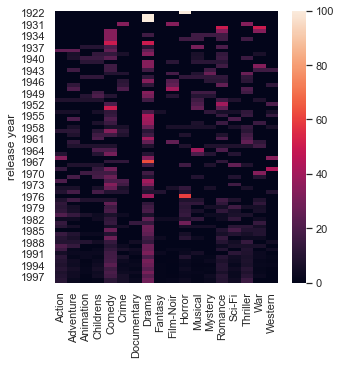

In [42]:
heat_map = sns.heatmap(movie_temp8.drop(['Total'], axis=1))              # apply heatmap to visualize the changes over the years

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [43]:
rc1 = rating['movie id'].value_counts().to_frame()           # find the count of ratings for every movie
rc1.rename(columns = {"movie id": "count"},  
          inplace = True) 
rc1['movie id']=rc1.index 
rc1

,count,movie id
50,583,50
258,509,258
100,508,100
181,507,181
294,485,294
...,...,...
1648,1,1648
1571,1,1571
1329,1,1329
1457,1,1457


In [44]:
rc2 = rating.loc[:,('movie id','rating')].groupby(['movie id']).sum()    # find the total rating scores for every movie
rc2

,rating
movie id,
1,1753
2,420
3,273
4,742
5,284
...,...
1678,1
1679,3
1680,2


In [45]:
moviecopy = movie.loc[:,('movie id','movie title')]                 # a new dataframe with only movie id and movie title                                       

In [46]:
rc3 = pd.merge(rc2, rc1, how='outer',on='movie id')                 # add movie id to the dataframe          
rc3['average rating']=rc3['rating']/rc3['count']                    # find the average rating for the movie
rc3

,movie id,rating,count,average rating
0,1,1753,452,3.878319
1,2,420,131,3.206107
2,3,273,90,3.033333
3,4,742,209,3.550239
4,5,284,86,3.302326
...,...,...,...,...
1677,1678,1,1,1.000000
1678,1679,3,1,3.000000
1679,1680,2,1,2.000000
1680,1681,3,1,3.000000


In [47]:
rc4 = pd.merge(rc3, moviecopy, how='outer',on='movie id')                  # find the average rating for the movie
rc4

,movie id,rating,count,average rating,movie title
0,1,1753,452,3.878319,Toy Story
1,2,420,131,3.206107,GoldenEye
2,3,273,90,3.033333,Four Rooms
3,4,742,209,3.550239,Get Shorty
4,5,284,86,3.302326,Copycat
...,...,...,...,...,...
1677,1678,1,1,1.000000,Mat' i syn
1678,1679,3,1,3.000000,B. Monkey
1679,1680,2,1,2.000000,Sliding Doors
1680,1681,3,1,3.000000,You So Crazy


In [48]:
rc5 = rc4[rc4['count']>100]                                               # find the movies with rating count>100
rc6 = rc5.sort_values(by='average rating',ascending=False).head(25)       # List the 25 top movies with highest average rating
rc6

,movie id,rating,count,average rating,movie title
407,408,503,112,4.491071,"Close Shave, A"
317,318,1331,298,4.466443,Schindler's List
168,169,527,118,4.466102,"Wrong Trousers, The"
482,483,1083,243,4.456790,Casablanca
63,64,1258,283,4.445230,"Shawshank Redemption, The"
602,603,917,209,4.387560,Rear Window
11,12,1171,267,4.385768,"Usual Suspects, The"
49,50,2541,583,4.358491,Star Wars
177,178,543,125,4.344000,12 Angry Men
133,134,850,198,4.292929,Citizen Kane


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [49]:
dfall = pd.merge(rating, user, how='outer',on='user id')
dfall1 = pd.merge(dfall,movie, how='outer',on='movie id')           # Merge all the datasets

In [50]:
dfall1

,user id,movie id,rating,timestamp,age,gender,occupation,zip code,movie title,release date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,55105,Kolya,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,305,242,5,886307828,23,M,programmer,94086,Kolya,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,242,4,883268170,42,M,executive,98101,Kolya,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,234,242,4,891033261,60,M,retired,94702,Kolya,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,63,242,3,875747190,31,M,marketing,75240,Kolya,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,863,1679,3,889289491,17,M,student,60089,B. Monkey,06-Feb-1998,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
99996,863,1678,1,889289570,17,M,student,60089,Mat' i syn,06-Feb-1998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,863,1680,2,889289570,17,M,student,60089,Sliding Doors,01-Jan-1998,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
99998,896,1681,3,887160722,28,M,writer,91505,You So Crazy,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
dfalltotal = dfall1['gender'].value_counts().to_frame()             # find the total number of records based on gender 
dfalltotal.rename(columns = {"gender": "total"},  
          inplace = True) 
dfalltotal

,total
M,74260
F,25740


In [52]:
drama_results = dfall1[dfall1['Drama']==1]              # Select Records Corresponding to Drama
drama = drama_results['gender'].value_counts().to_frame()       
dfalltotal['Drama Percentage']=drama['gender']/dfalltotal['total'] # compute the percentage of gender

In [53]:
SciFi_results = dfall1[dfall1['Sci-Fi']==1]                     # Select Records Corresponding to Sci-Fi
SF = SciFi_results['gender'].value_counts().to_frame()         
dfalltotal['Sci-Fi Percentage']=SF['gender']/dfalltotal['total'] # compute the percentage of gender

In [54]:
Roman_results = dfall1[dfall1['Romance']==1]                     # Select Records Corresponding to Sci-Fi
Roman=Roman_results['gender'].value_counts().to_frame()  
dfalltotal['Romance Percentage']=Roman['gender']/dfalltotal['total'] # compute the percentage of gender

In [55]:
dfalltotal

,total,Drama Percentage,Sci-Fi Percentage,Romance Percentage
M,74260,0.388998,0.136022,0.183181
F,25740,0.427661,0.102137,0.227584


* "Men watch more drama than women" is false
* "Women watch more Sci-Fi than men" is false
* "Men watch more Romance than women" is false